# MICrONS distance dependence modelling 

Getting parameters for the distance dependence control model for MICrONS as well as for the modified circuits used to check errors in the EM reconstruction.  See ``MICrONS_errors_generate_controls.ipynb`` to see how these matrices were built.

In [1]:
import pandas as pd
import numpy as np
import conntility
from connalysis import modelling
import matplotlib.pyplot as plt 

import sys
sys.path.append('../../../library')
from structural_basic import load_connectome

In [2]:
# Loading original data 
data_dir="../../data"
M=load_connectome(data_dir, 'MICrONS')
adj=M.matrix.astype('bool').tocsr() # removing weights of synapses

### Configure model

In [3]:
# Vertex properties do not change for EM error controls since only connections are changed.
nrn_info=M.vertices
N=adj.shape[0]

# Bin size previously optimized for cell locations
config_dict = {'model_name': 'ConnProb2ndOrder',  # Name of the model (to be used in file names, ...)
               'model_order': 2,                  # Model order
               'coord_names': ['x_nm', 'y_nm', 'z_nm'], # name of coordinates in nrn_info data frame
               'bin_size_um': 65000,                # Bin size (um) for depth binning
               'max_range_um': None,              # Max. distance (um) range to consider (None to use full distance range)
               'sample_size': N,               # Size of random subset of neurons to consider (0 or None to disable subsampling)
               'sample_seed': None,               # Seed for selecting random subset of neurons
               'model_dir': None, # Output directory where to save the model (None to disable saving)
               'data_dir': None,    # Output directory where to save the extracted data (None to disable saving)
               'do_plot': True,                   # Enable/disable output plotting
               'plot_dir': None,    # Output directory where to save the plots (None to disable saving)
               'N_split': None,                   # Number of data splits to sequentially run computations on, reducing memory consumption (None to disable splitting)
               'part_idx': None}     

### Build models 

 2024-07-29 13:51:46,812: Running order-2 model building {'coord_names': ['x_nm', 'y_nm', 'z_nm'], 'bin_size_um': 65000, 'max_range_um': None, 'sample_size': 9619, 'sample_seed': None, 'model_dir': None, 'data_dir': None, 'do_plot': True, 'plot_dir': None, 'N_split': None, 'part_idx': None}...
 2024-07-29 13:51:47,820: Extracting 1-dimensional (13) connection probabilities...
100% |#########################################################################|
 2024-07-29 13:51:58,634: MODEL FIT: f(x) = 0.067057 * exp(-0.000012 * x)
 2024-07-29 13:51:59,505: Running order-2 model building {'coord_names': ['x_nm', 'y_nm', 'z_nm'], 'bin_size_um': 65000, 'max_range_um': None, 'sample_size': 9619, 'sample_seed': None, 'model_dir': None, 'data_dir': None, 'do_plot': True, 'plot_dir': None, 'N_split': None, 'part_idx': None}...
 2024-07-29 13:52:00,518: Extracting 1-dimensional (13) connection probabilities...
100% |#########################################################################|
 2024-

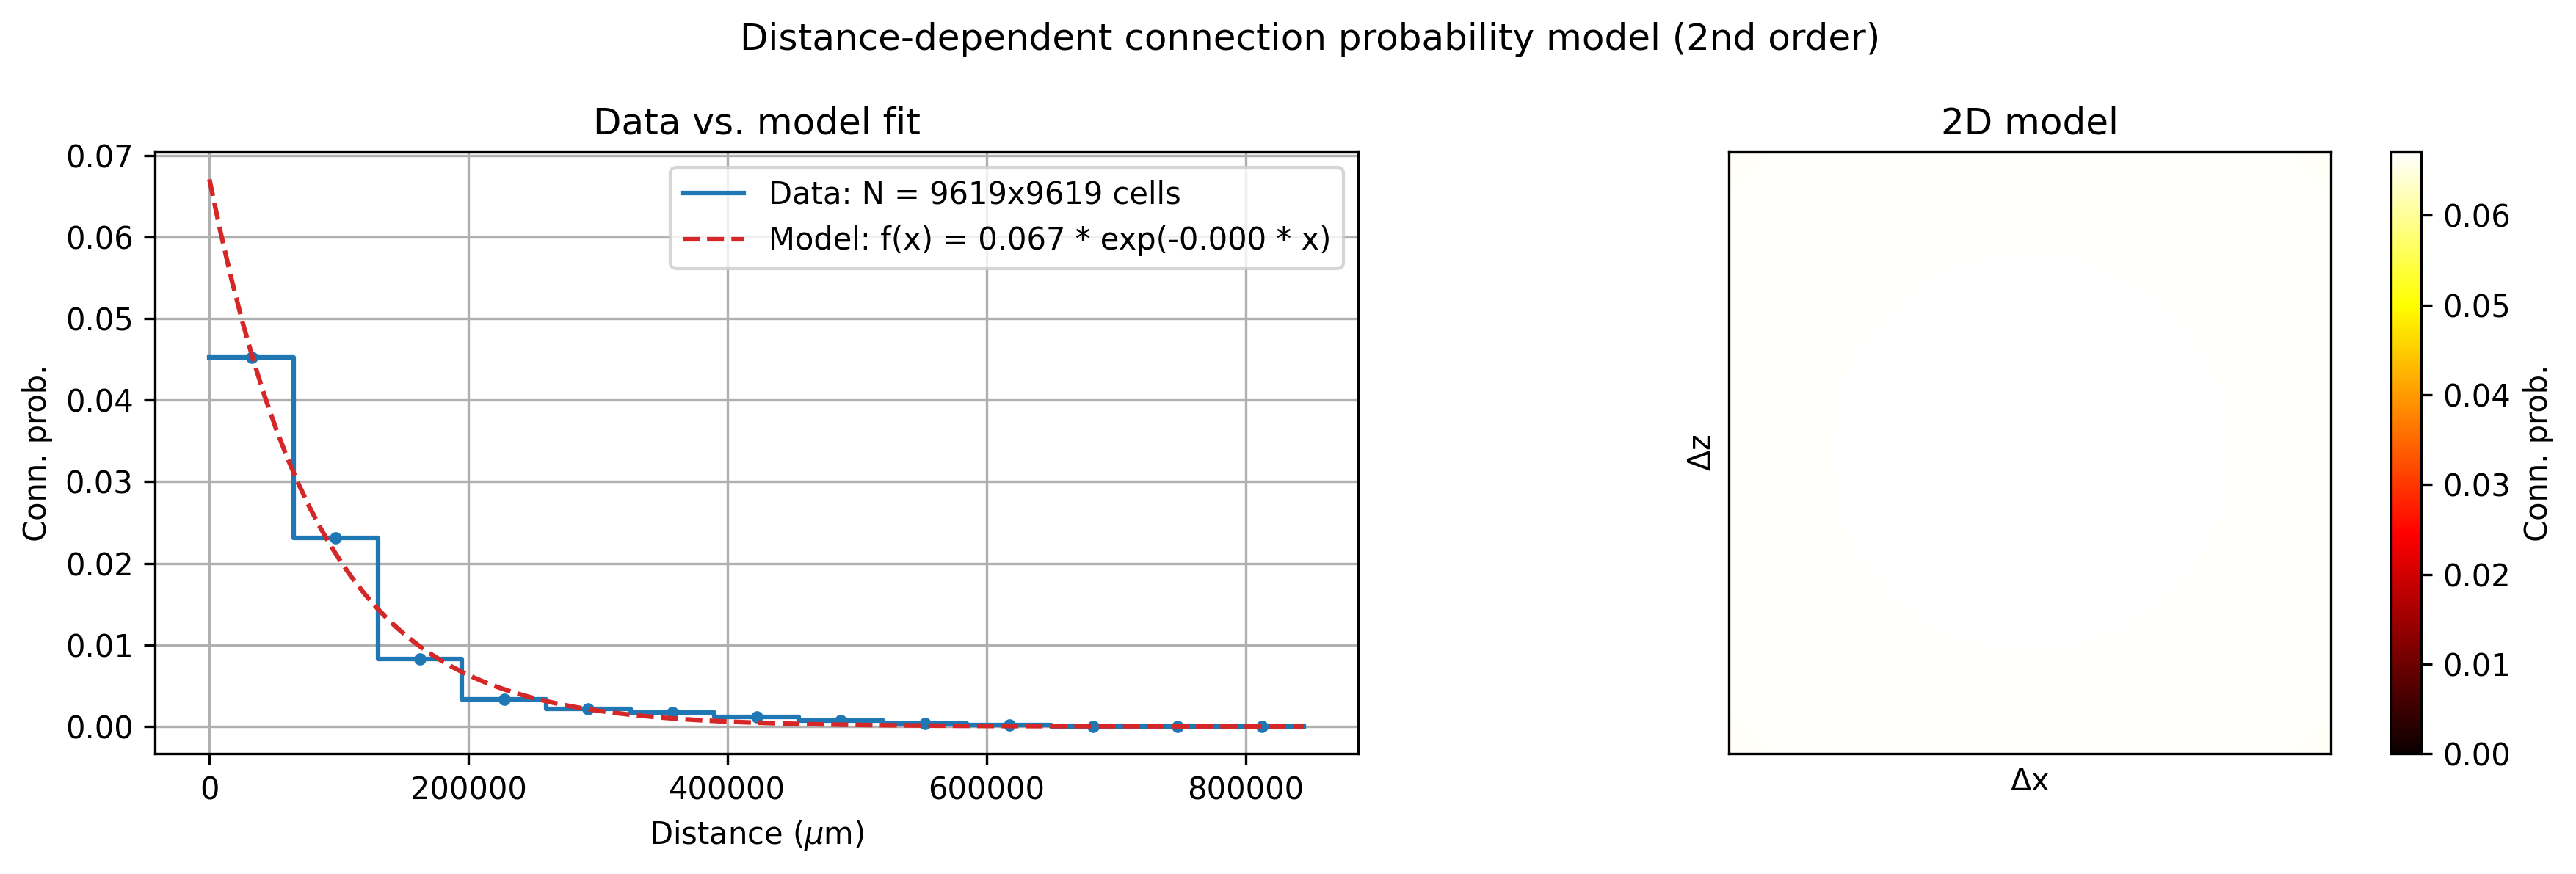

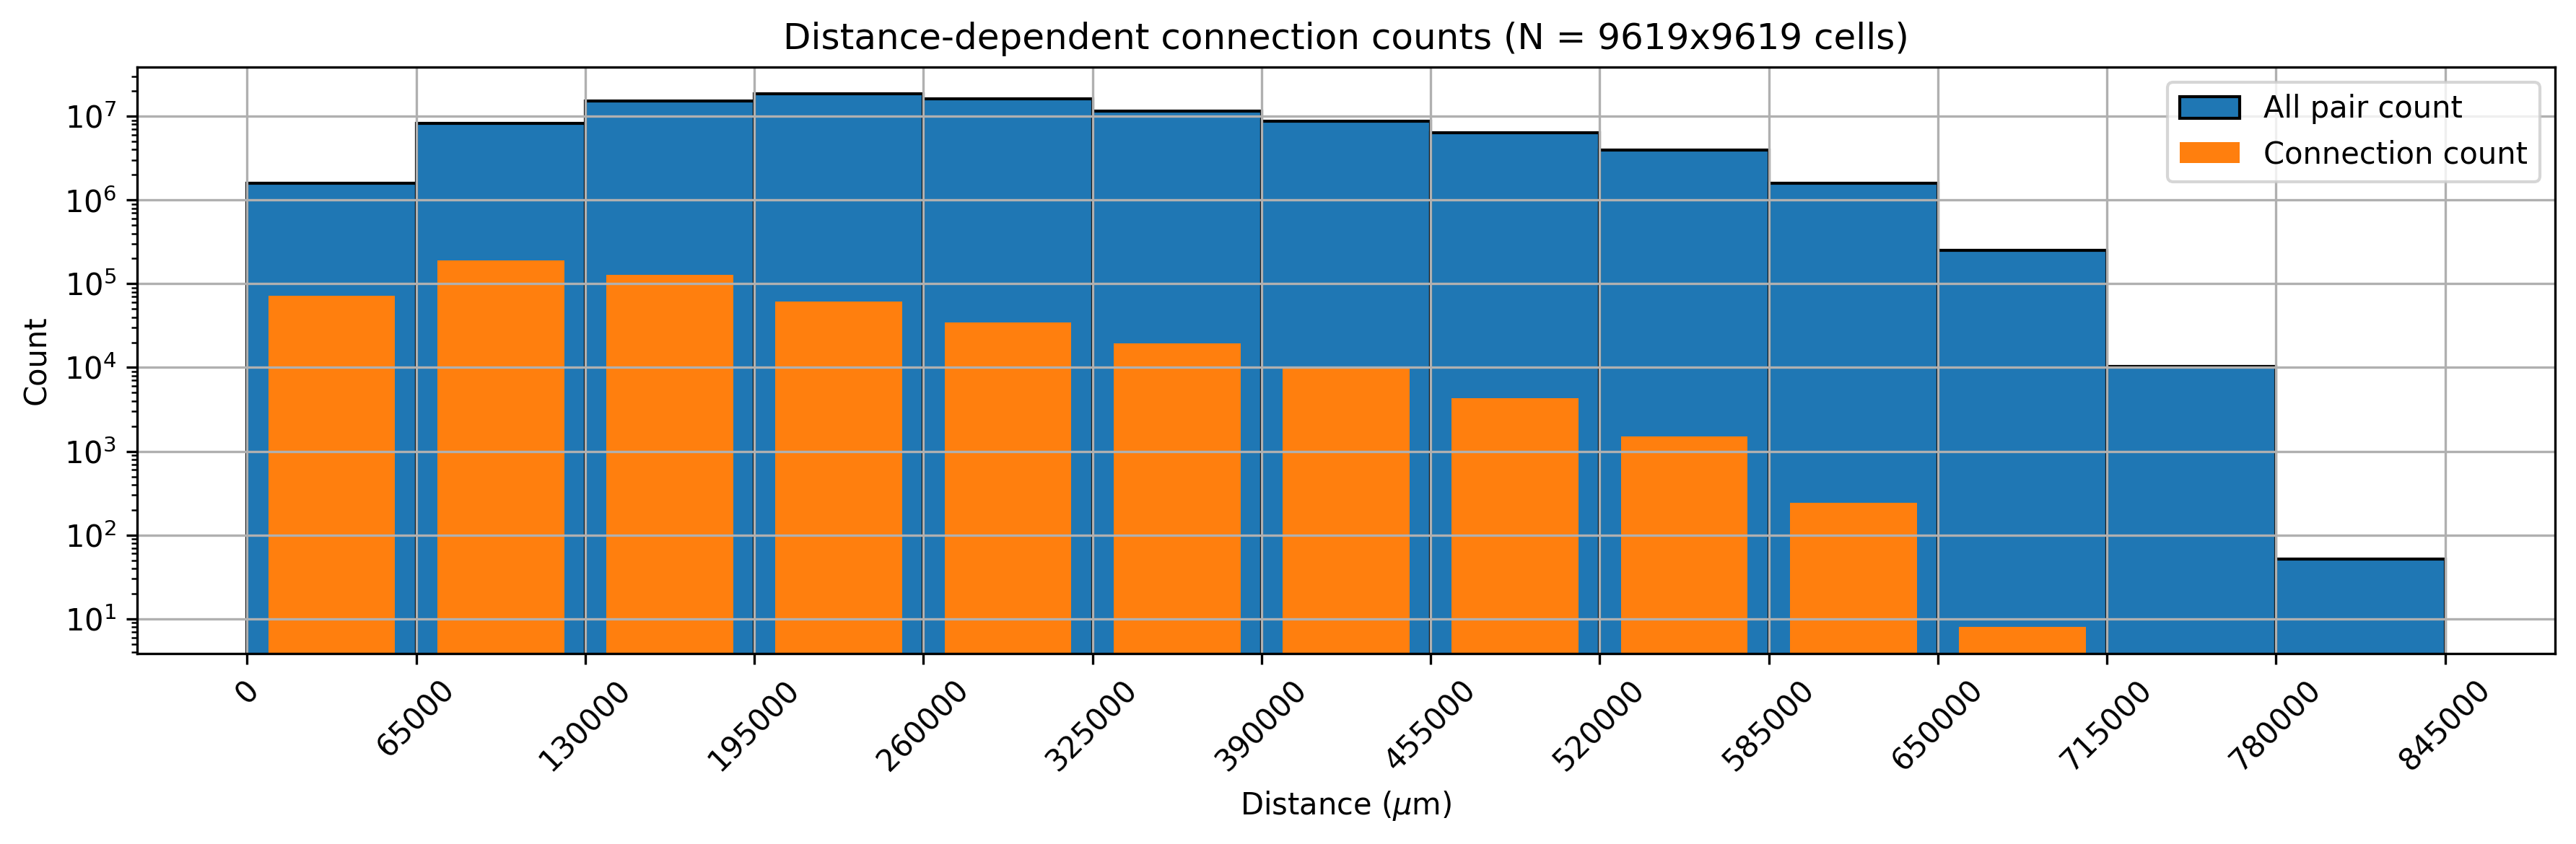

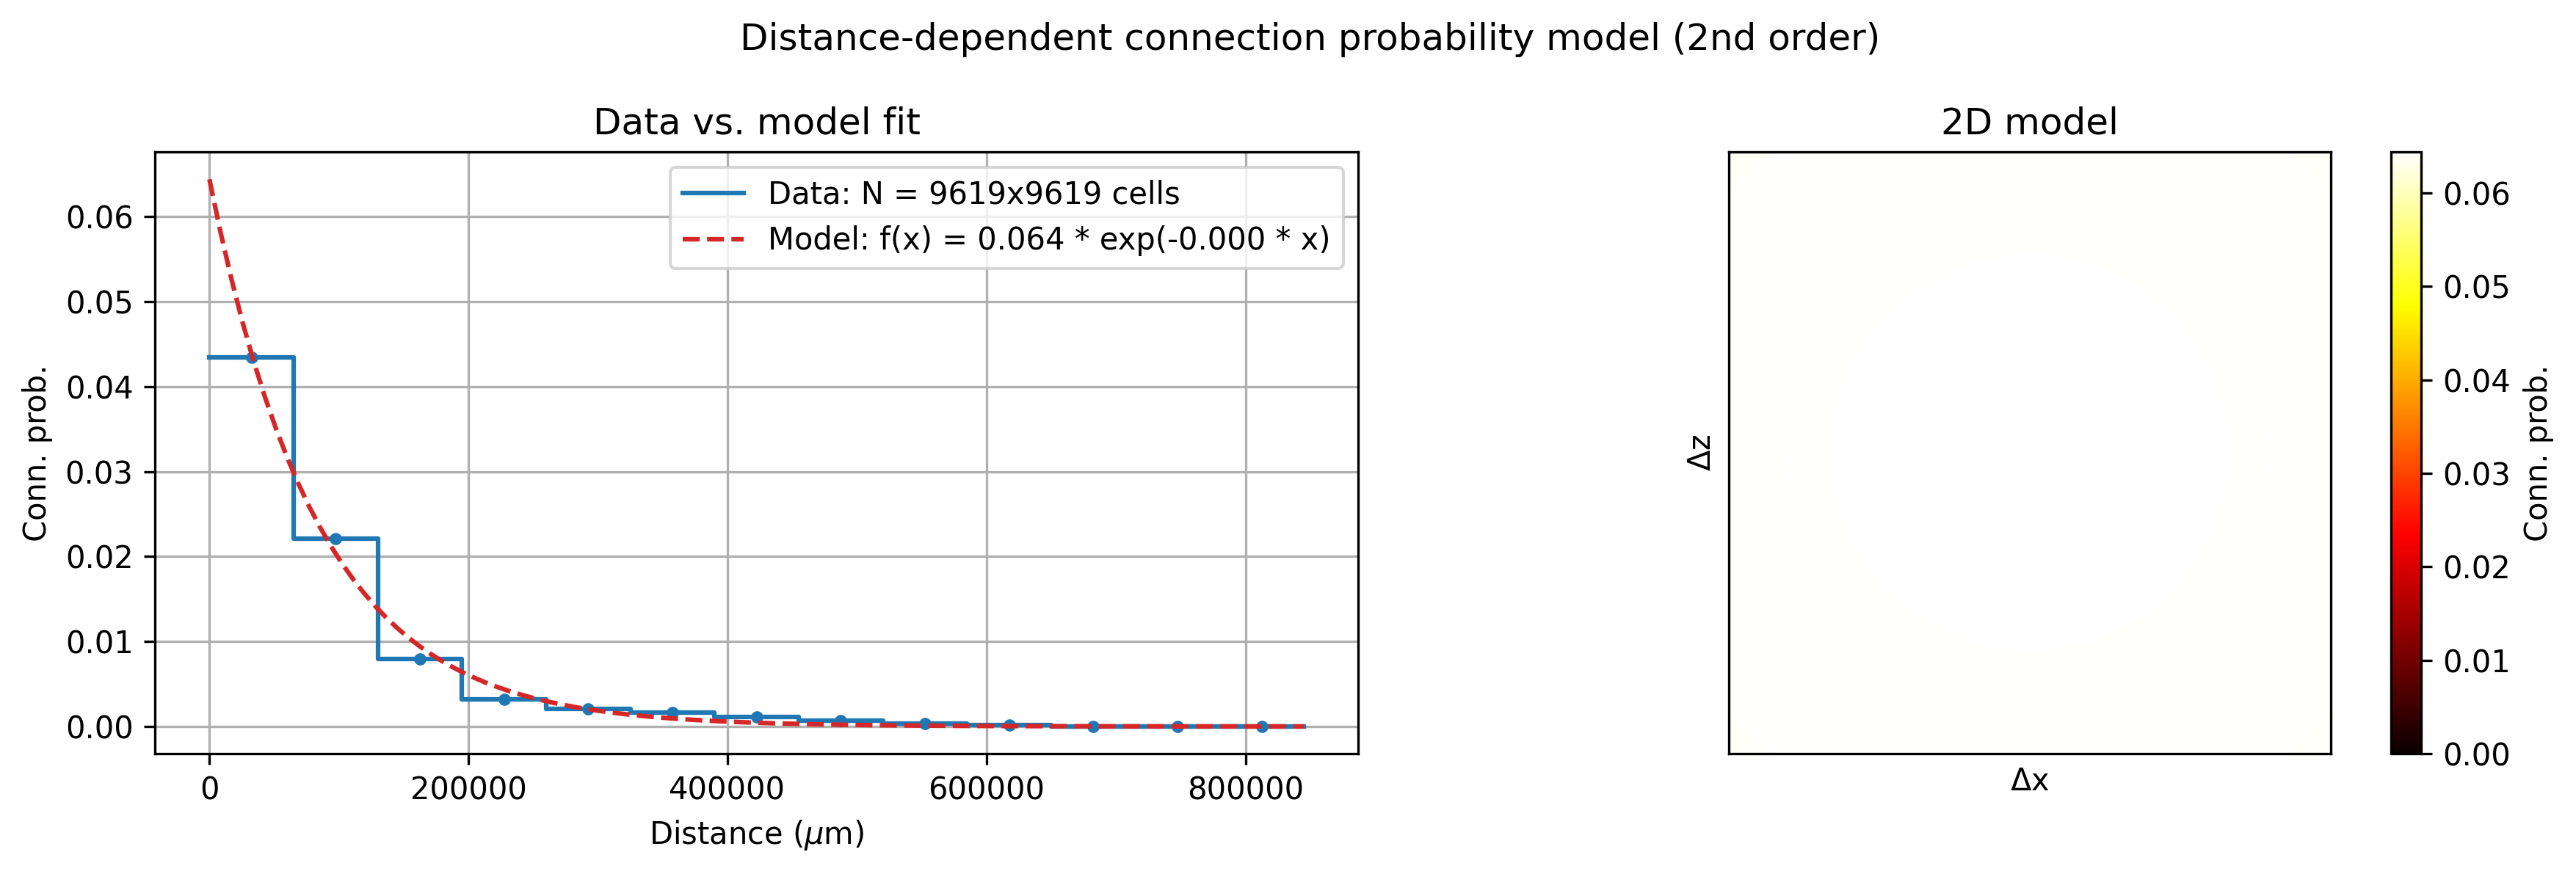

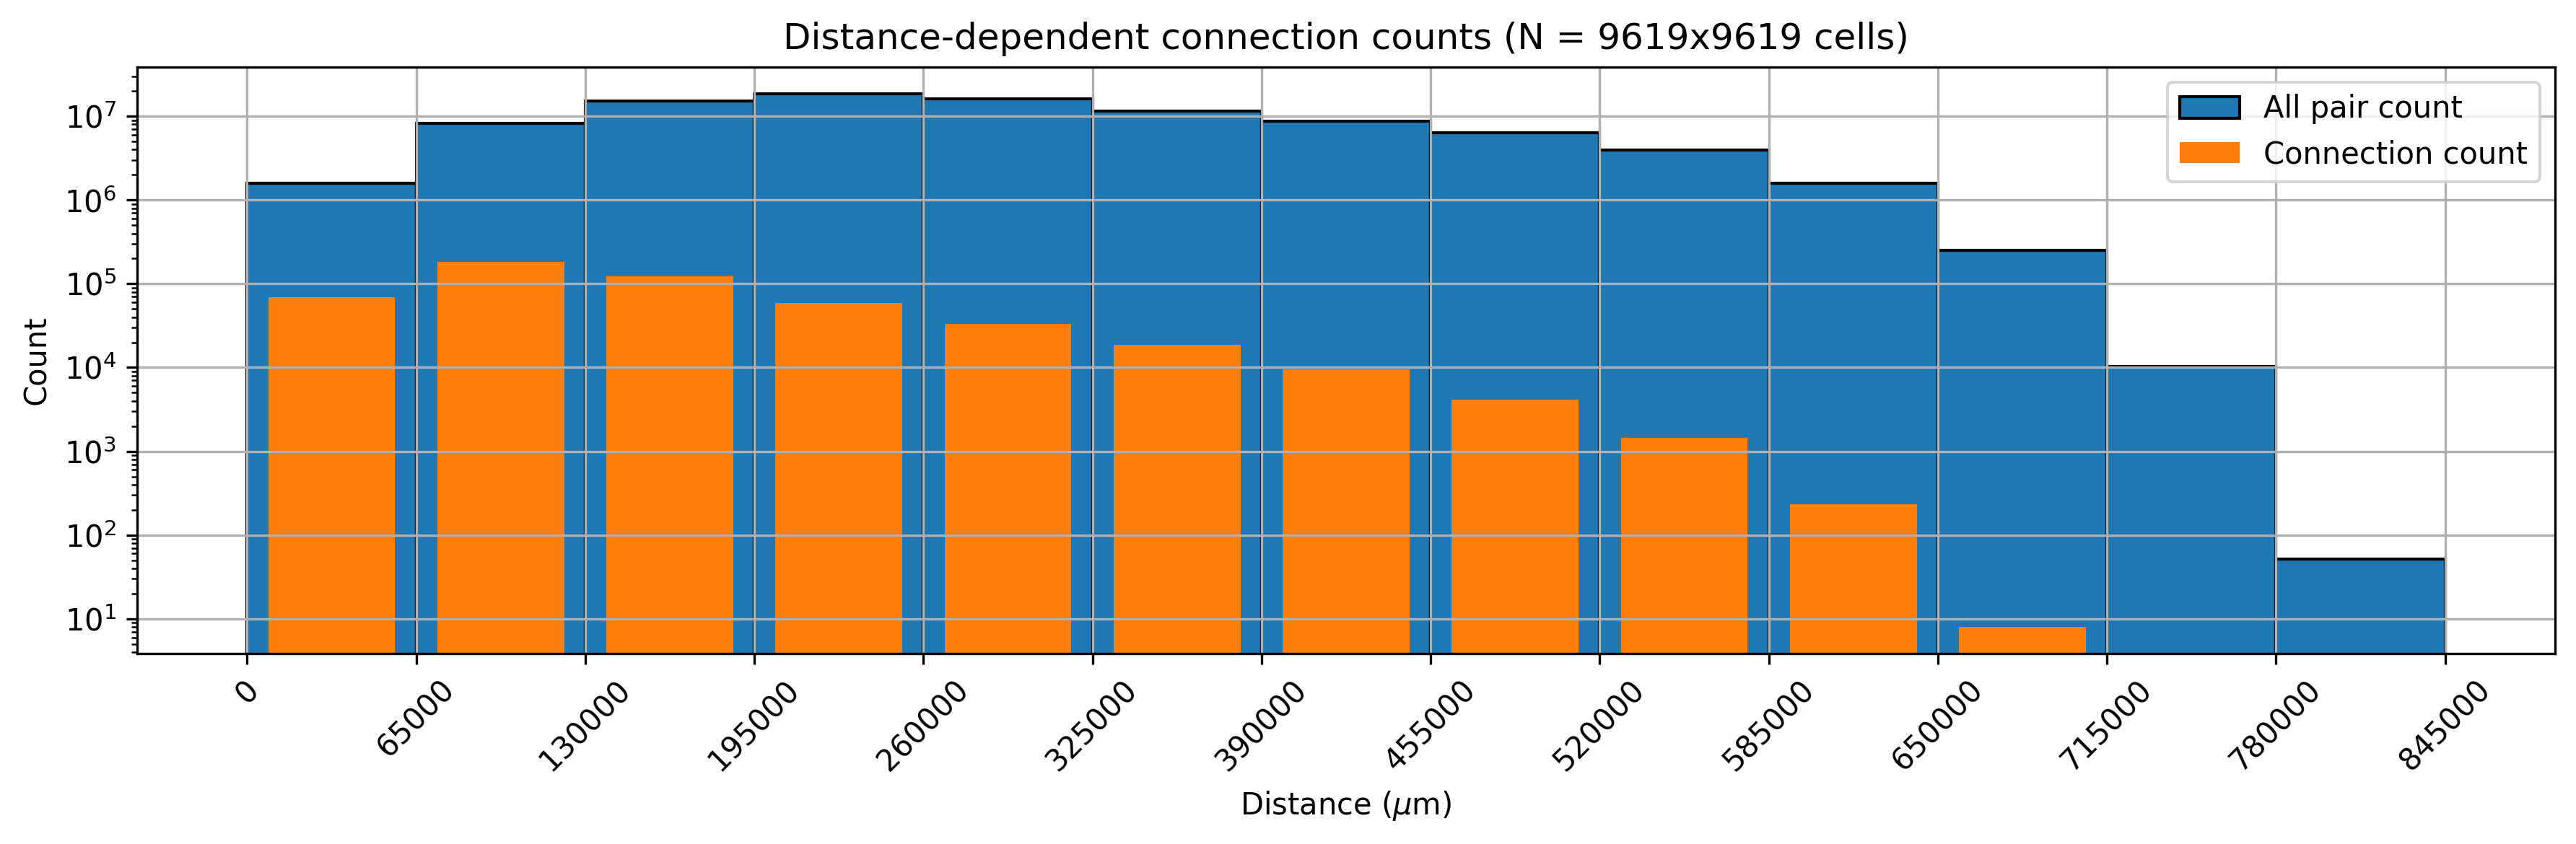

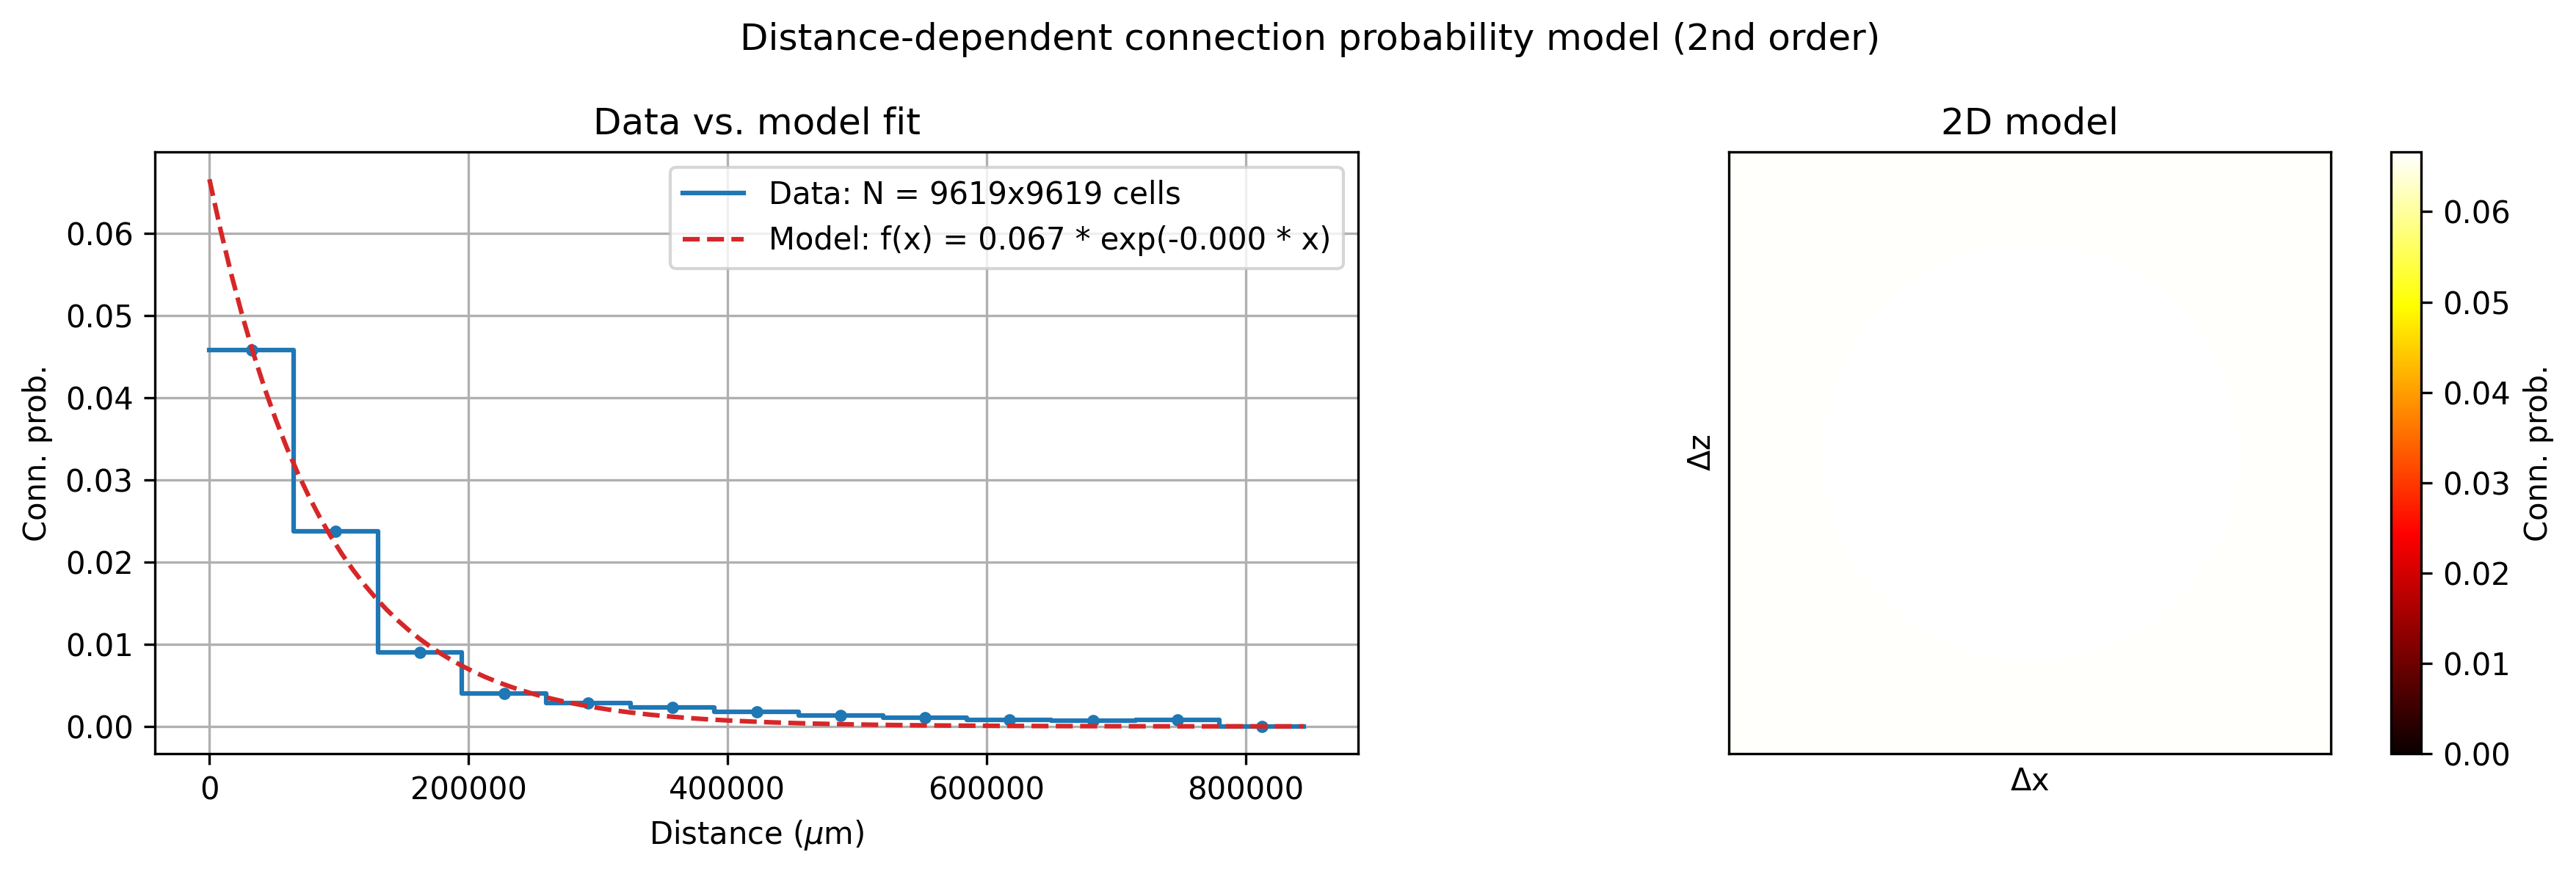

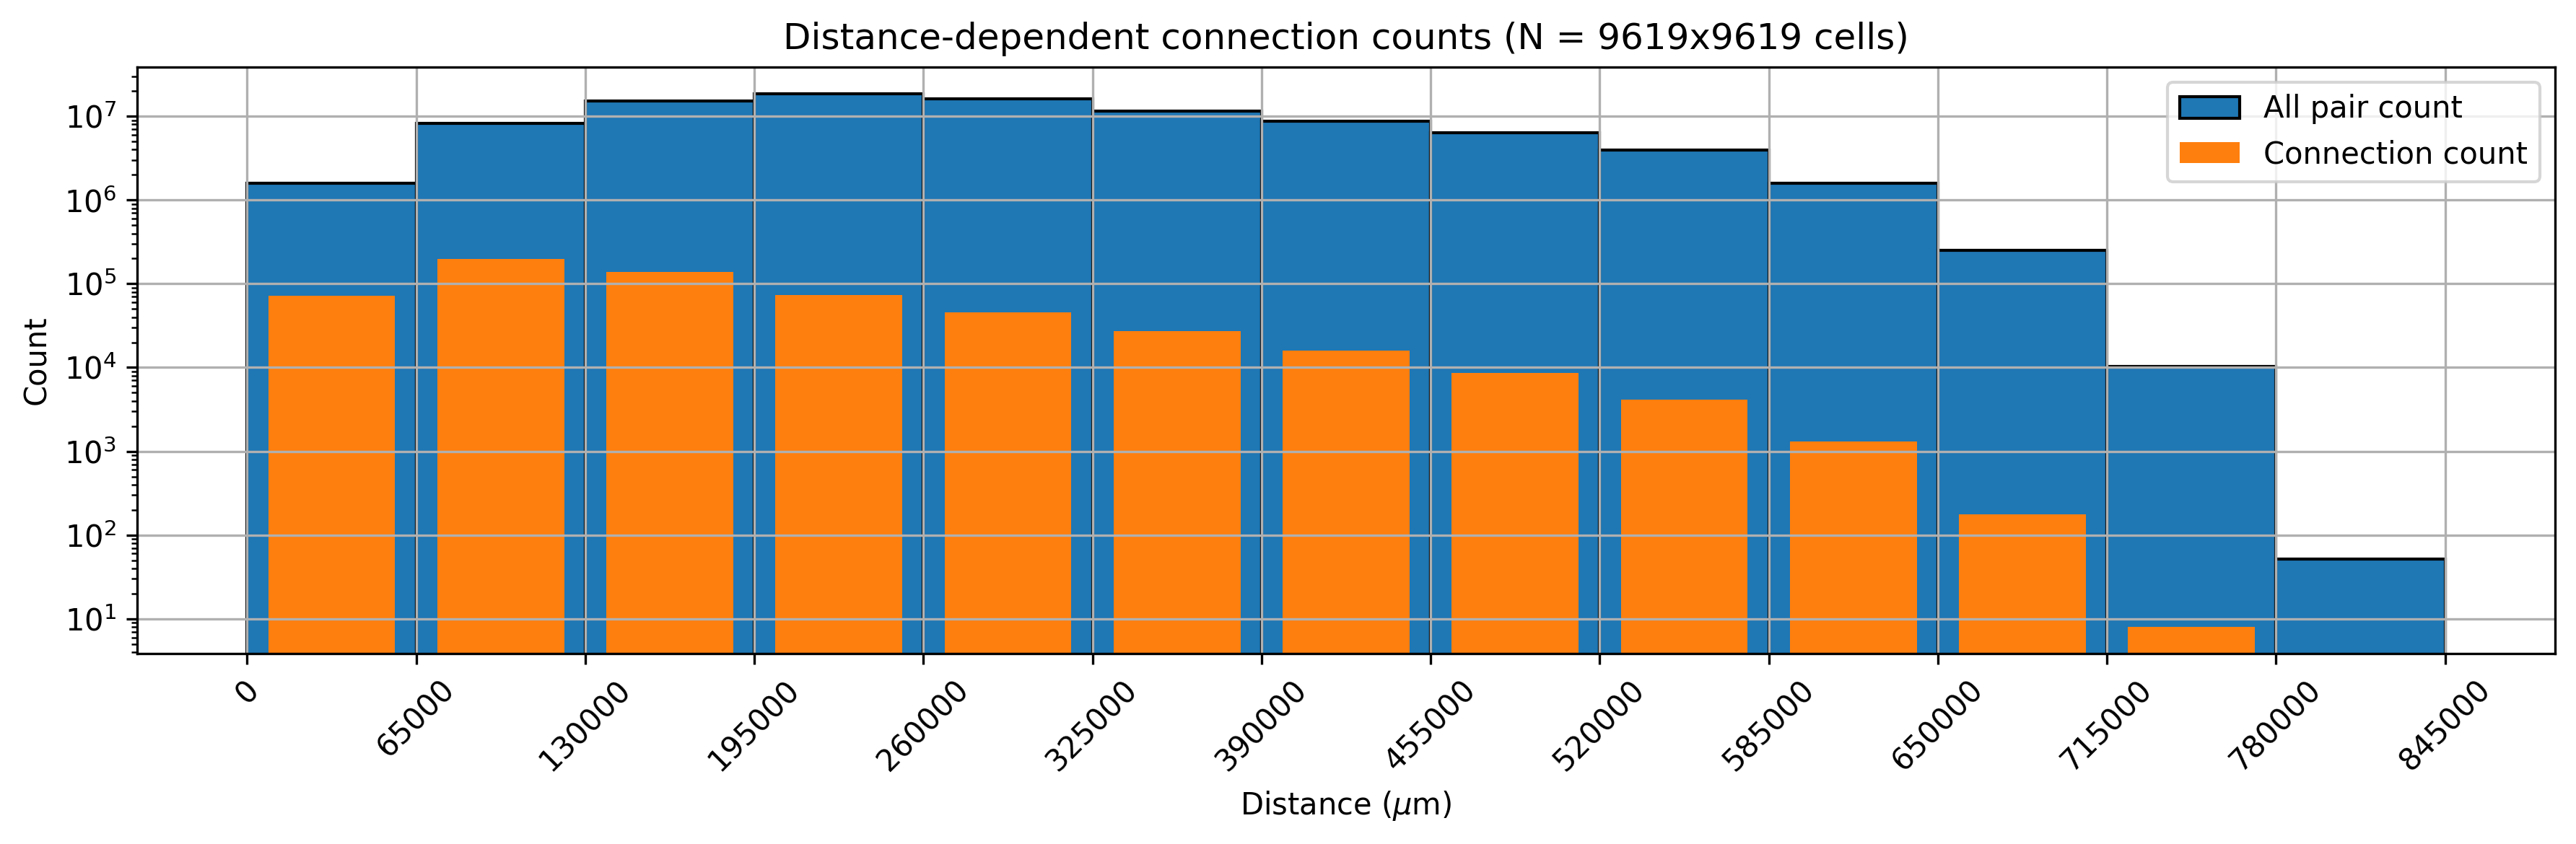

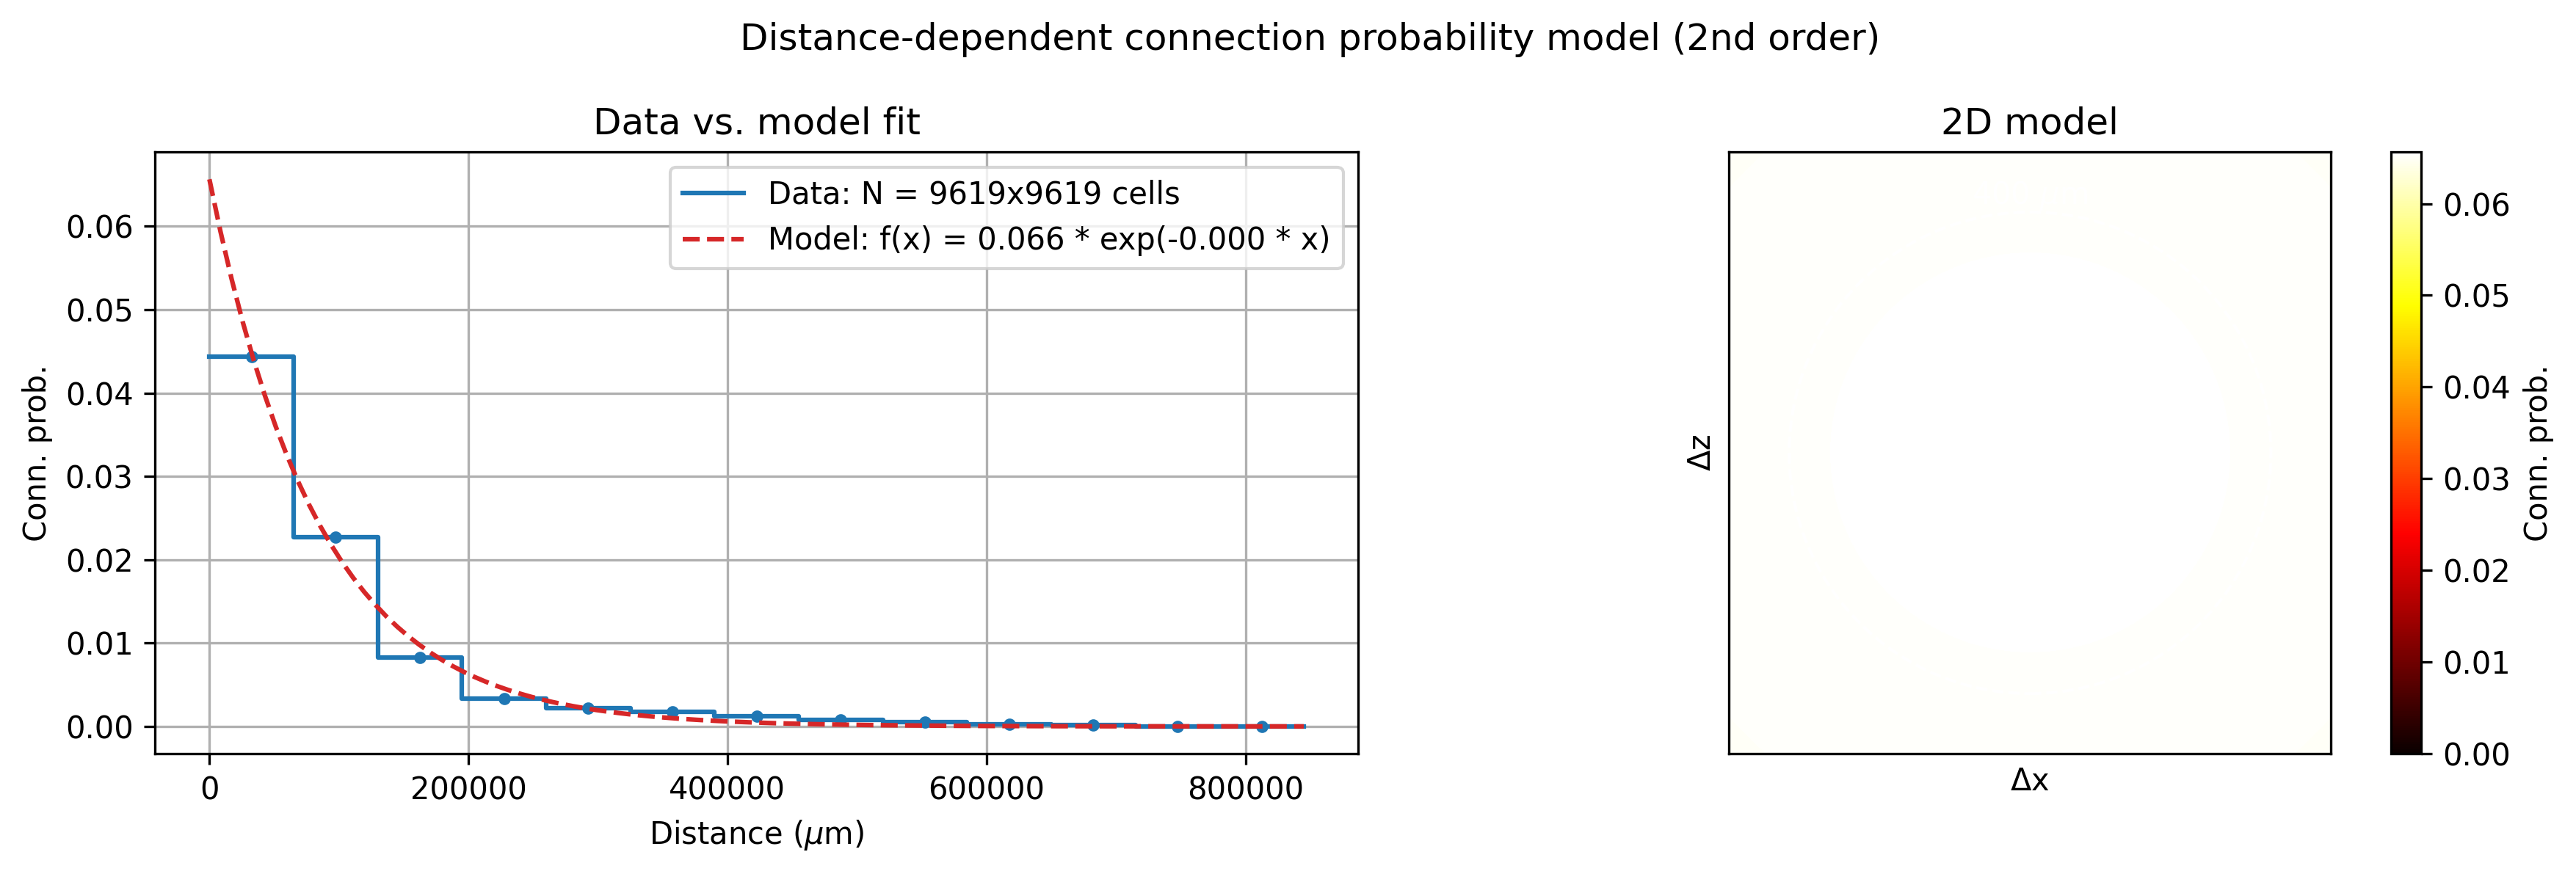

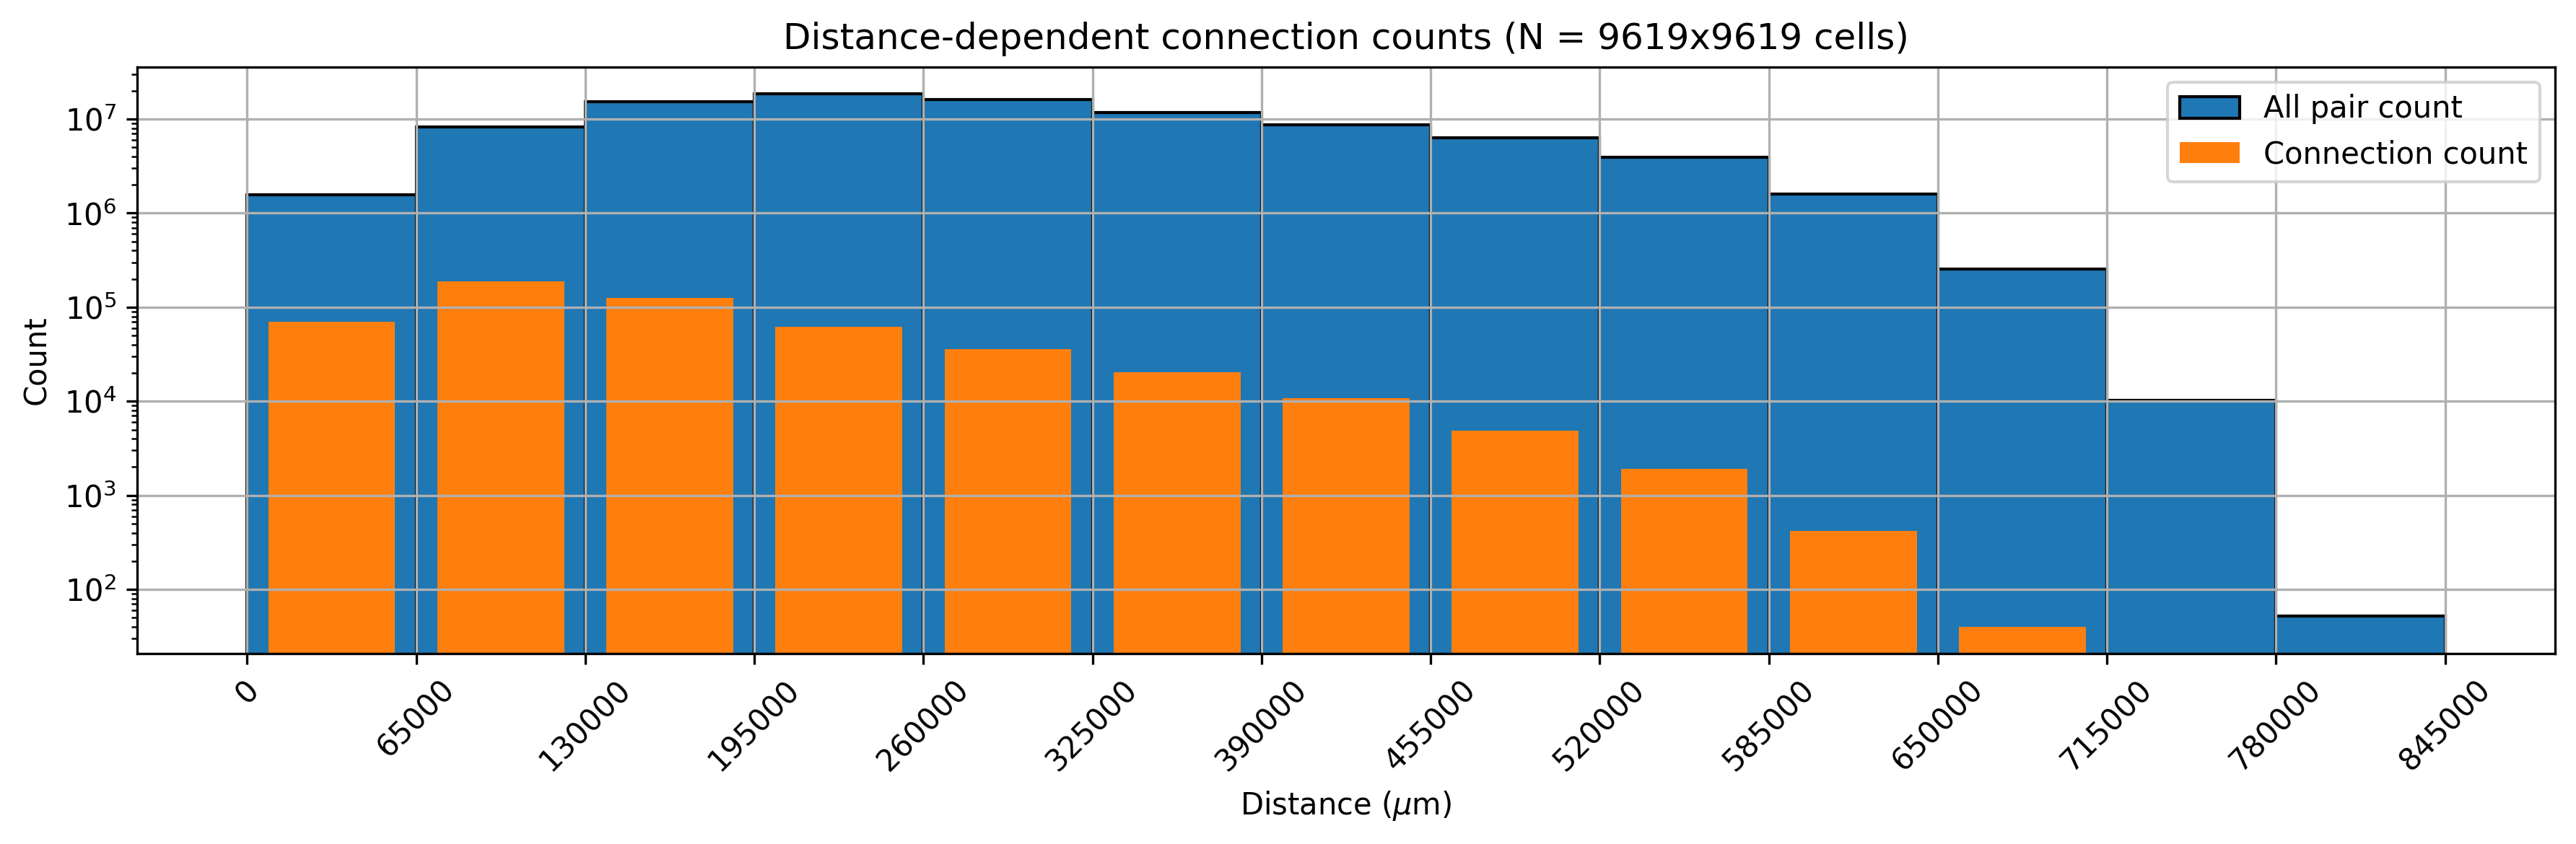

In [4]:
parameters={}
# Build model original 
parameters["original"]=modelling.run_model_building(adj, nrn_info, **config_dict)

# Build model controls
for  connectome in ["MICrONS_EM_error_precision", "MICrONS_EM_error_recall", "MICrONS_EM_error_partner"]:
    adj_ctr=load_connectome(data_dir, f"{connectome}").matrix.astype(bool).tocsr()
    parameters[connectome]=modelling.run_model_building(adj_ctr, nrn_info, **config_dict)

In [5]:
for  connectome in ["original", "MICrONS_EM_error_precision", "MICrONS_EM_error_recall", "MICrONS_EM_error_partner"]:
    print(f"{connectome}: \n{parameters[connectome][-1]}\n\n")

original: 
{'model': 'exp_model_scale * np.exp(-exp_model_exponent * np.array(d))', 'model_inputs': ['d'], 'model_params': {'exp_model_scale': 0.06705720999872188, 'exp_model_exponent': 1.183000158541148e-05}}


MICrONS_EM_error_precision: 
{'model': 'exp_model_scale * np.exp(-exp_model_exponent * np.array(d))', 'model_inputs': ['d'], 'model_params': {'exp_model_scale': 0.06439483973461382, 'exp_model_exponent': 1.1831646270356818e-05}}


MICrONS_EM_error_recall: 
{'model': 'exp_model_scale * np.exp(-exp_model_exponent * np.array(d))', 'model_inputs': ['d'], 'model_params': {'exp_model_scale': 0.06661164694695909, 'exp_model_exponent': 1.1284968613355177e-05}}


MICrONS_EM_error_partner: 
{'model': 'exp_model_scale * np.exp(-exp_model_exponent * np.array(d))', 'model_inputs': ['d'], 'model_params': {'exp_model_scale': 0.06564689942531857, 'exp_model_exponent': 1.1738171815235674e-05}}


